<a href="https://colab.research.google.com/github/69421/testRepo/blob/main/Lab_13_Finding_Correlation_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [ ]:
# Install the necessary libraries
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [ ]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


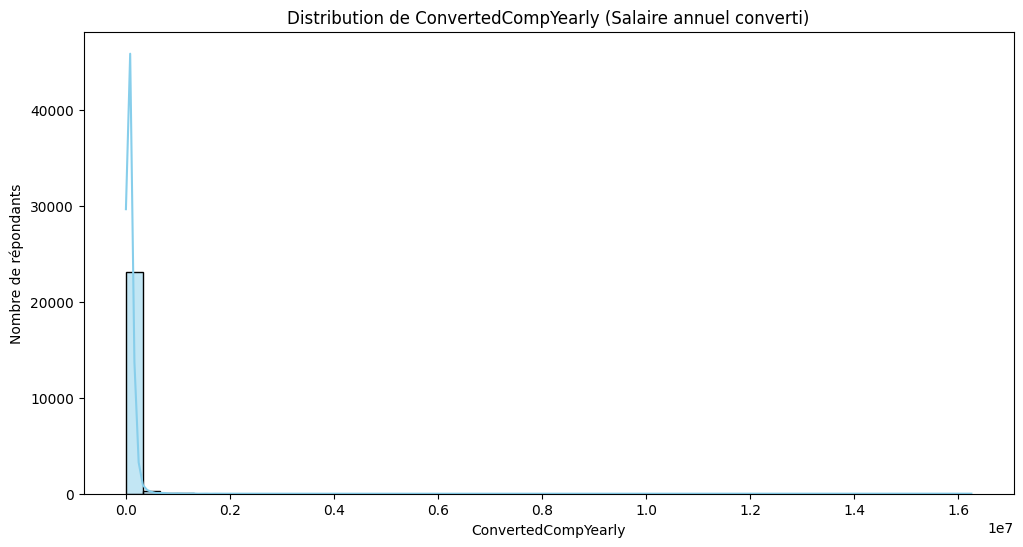

In [ ]:
## Write your code here
comp = df['ConvertedCompYearly'].dropna()
plt.figure(figsize=(12,6))

sns.histplot(comp, bins=50, kde=True, color="skyblue")

plt.title("Distribution de ConvertedCompYearly (Salaire annuel converti)")
plt.xlabel("ConvertedCompYearly")
plt.ylabel("Nombre de répondants")

# Option sans limitation d'axe X
# plt.xlim(0, comp.quantile(0.99))

plt.show()


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [ ]:
## Write your code here
full_time_comp = df[df['Employment'] == 'Employed, full-time']['ConvertedCompYearly']
median_full_time_comp = full_time_comp.median()
print(f"The median compensation for full-time employees is: {median_full_time_comp}")

The median compensation for full-time employees is: 69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [ ]:
## Write your code here
# Filtrer données valides
df_filtered = df[["Country", "ConvertedCompYearly"]].dropna()

# Option : garder les pays les plus représentés pour éviter un graphe illisible
top_countries = df_filtered["Country"].value_counts().head(15).index  # top 15 pays
df_filtered = df_filtered[df_filtered["Country"].isin(top_countries)]



<ipython-input-10-b1f94f40df11>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


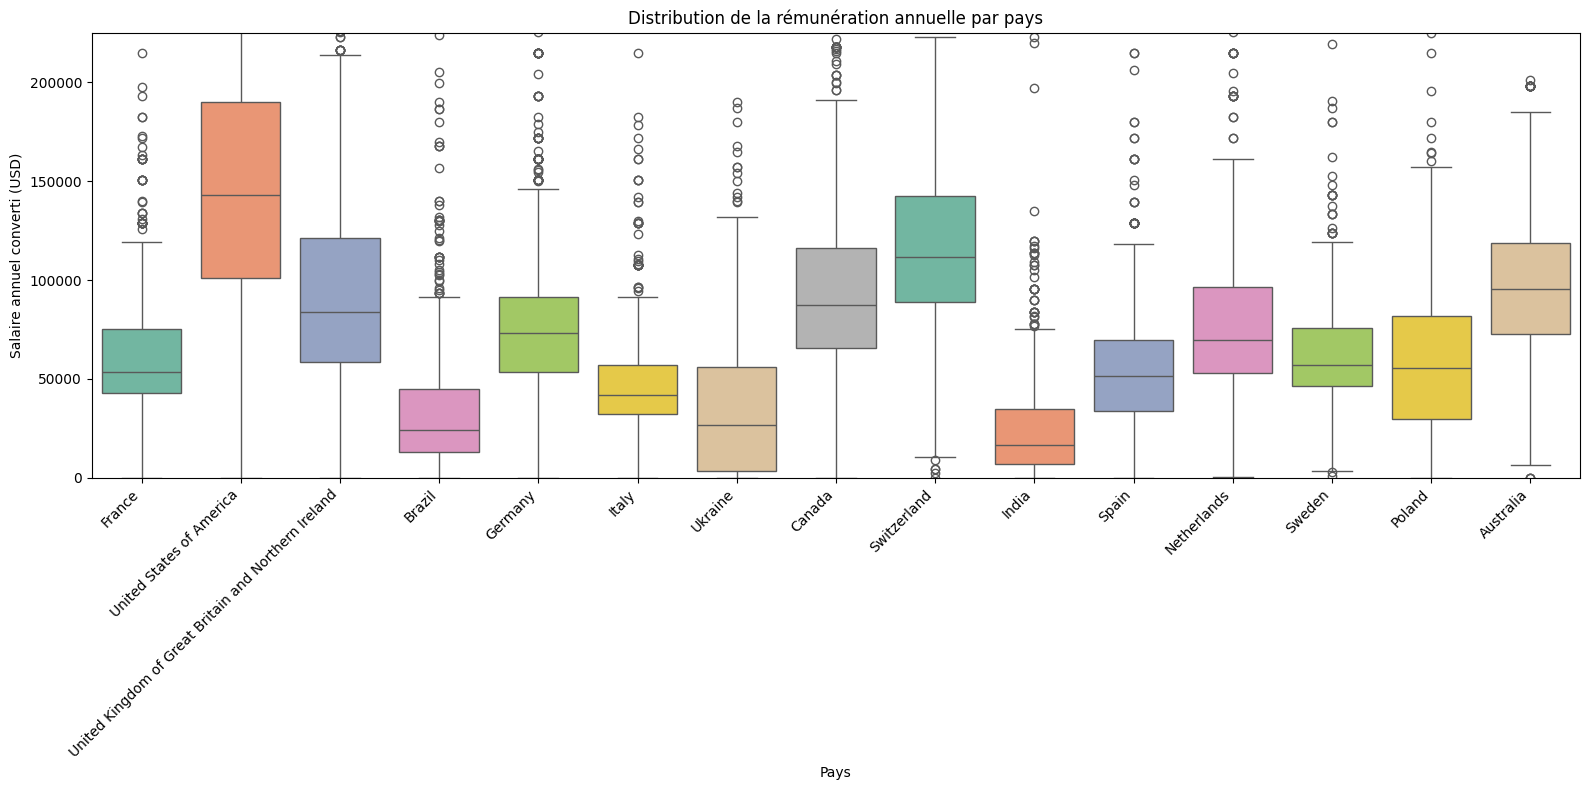

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))

# Boxplot groupé par pays
sns.boxplot(
    data=df_filtered,
    x="Country",
    y="ConvertedCompYearly",
    palette="Set2"
)

# Rotation des noms de pays pour lisibilité
plt.xticks(rotation=45, ha="right")
plt.title("Distribution de la rémunération annuelle par pays")
plt.ylabel("Salaire annuel converti (USD)")
plt.xlabel("Pays")

# Limiter l’échelle pour éviter que les outliers écrasent les boîtes
plt.ylim(0, df_filtered["ConvertedCompYearly"].quantile(0.95))

plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [12]:
## Write your code here
# Supprimer les valeurs manquantes
comp = df["ConvertedCompYearly"].dropna()

# Calcul des quartiles
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes inférieure et supérieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")



Lower bound: -80177.25
Upper bound: 220860.75


In [13]:
# Créer une version propre du DataFrame
df_clean = df[(df["ConvertedCompYearly"] >= lower_bound) &
              (df["ConvertedCompYearly"] <= upper_bound)]

# Afficher la taille des deux datasets
print(f"Taille originale : {df.shape[0]}")
print(f"Taille après suppression des outliers : {df_clean.shape[0]}")


Taille originale : 65437
Taille après suppression des outliers : 22457


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [14]:
# Sélectionner les colonnes d'intérêt
cols = ["ConvertedCompYearly", "WorkExp", "JobSatPoints_1"]

# Créer un DataFrame filtré avec ces colonnes (et sans outliers si déjà filtré)
df_corr = df_clean[cols].dropna()

In [15]:
# Calcul des corrélations de Pearson
corr_matrix = df_corr.corr()

print("Matrice de corrélation :")
print(corr_matrix)


Matrice de corrélation :
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.406993       -0.059643
WorkExp                         0.406993  1.000000       -0.032388
JobSatPoints_1                 -0.059643 -0.032388        1.000000


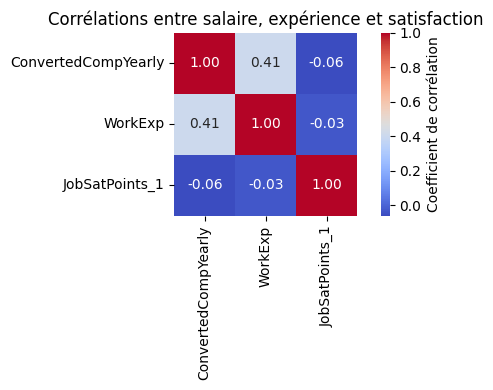

In [16]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={'label': 'Coefficient de corrélation'}
)
plt.title("Corrélations entre salaire, expérience et satisfaction")
plt.tight_layout()
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


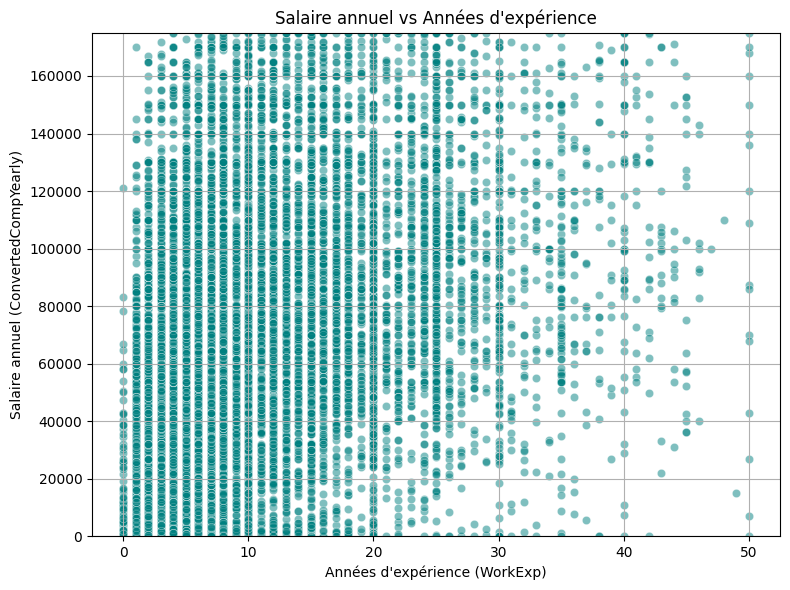

In [17]:
## Write your code here
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_clean,
    x="WorkExp",
    y="ConvertedCompYearly",
    alpha=0.5,
    color='teal'
)

plt.title("Salaire annuel vs Années d'expérience")
plt.xlabel("Années d'expérience (WorkExp)")
plt.ylabel("Salaire annuel (ConvertedCompYearly)")
plt.ylim(0, df_clean["ConvertedCompYearly"].quantile(0.95))  # Optionnel pour ignorer les très hauts salaires
plt.grid(True)
plt.tight_layout()
plt.show()

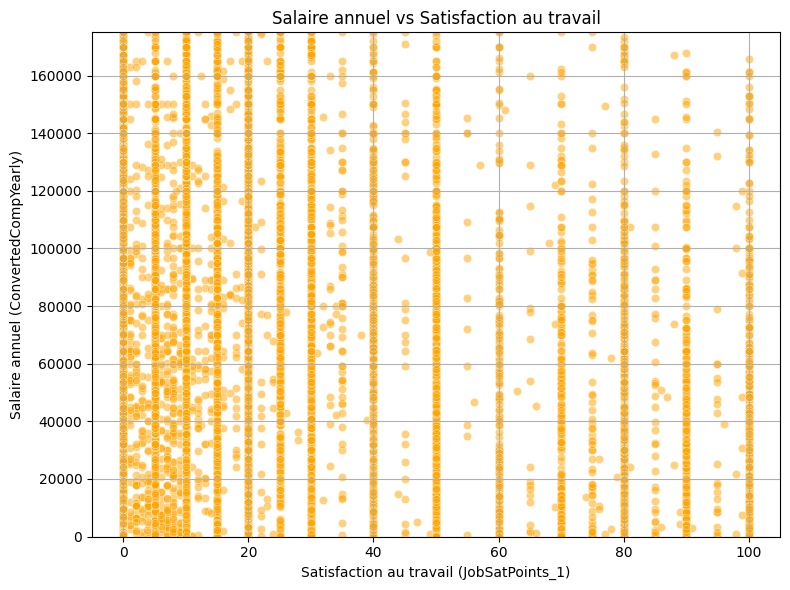

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_clean,
    x="JobSatPoints_1",
    y="ConvertedCompYearly",
    alpha=0.5,
    color='orange'
)

plt.title("Salaire annuel vs Satisfaction au travail")
plt.xlabel("Satisfaction au travail (JobSatPoints_1)")
plt.ylabel("Salaire annuel (ConvertedCompYearly)")
plt.ylim(0, df_clean["ConvertedCompYearly"].quantile(0.95))  # Pour lisibilité
plt.grid(True)
plt.tight_layout()
plt.show()


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
